# Whelks and lobsters -- context operator

## The system

In [40]:
# figure sizing considerations
textwidth = 6.26894 # inches
textwidthpx = 72 * textwidth # width of text in pixels at 72 dpi

In [11]:
%display latex

In [12]:
from whelks_and_lobsters_benchmarking import *
from lbuc import RestrictionMethod
from lbuc import *

In [13]:
from lbuc.bondcalculus import *

In [14]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [15]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-bldh8gbk.py"' ...


## Property

In [16]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 > 0.2)
prop = F(RIF(0.1, 0.2), P)

In [17]:
kwargs = dict(
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True)

In [18]:
psets = (
    [(d, (0.01, 0.2), 5) for d in range(7)]
); psets

[(0, (0.0100000000000000, 0.200000000000000), 5),
 (1, (0.0100000000000000, 0.200000000000000), 5),
 (2, (0.0100000000000000, 0.200000000000000), 5),
 (3, (0.0100000000000000, 0.200000000000000), 5),
 (4, (0.0100000000000000, 0.200000000000000), 5),
 (5, (0.0100000000000000, 0.200000000000000), 5),
 (6, (0.0100000000000000, 0.200000000000000), 5)]

In [19]:
def res(vs):
    depth, step, order = vs
    return test_signal_refinement(
        f'depth-{depth}-{step}-{order}',
        prop,
        5,
        depth,
        order=order,
        step=step,
        **kwargs,
    )

In [20]:
ress = list(pool.map(res, psets))

Generating Reach Tree: 1 items in 0.00 seconds
Generating Reach Tree: 1 items in 0.00 seconds
Generating Reach Tree: 1 items in 0.00 seconds
Generating Reach Tree: 1 items in 0.00 seconds
Monitoring initial signal: 1 items in 1.30 seconds
Monitoring initial signal: 1 items in 1.32 seconds
Monitoring initial signal: 1 items in 1.32 seconds
Monitoring initial signal: 1 items in 1.35 seconds
Run depth-0-(0.0100000000000000, 0.200000000000000)-5 done in 1.3644602589920396 sec
Generating Reach Tree: 1 items in 0.00 seconds
Run depth-1-(0.0100000000000000, 0.200000000000000)-5 done in 2.5377128359978087 sec
Generating Reach Tree: 1 items in 0.00 seconds
Monitoring initial signal: 1 items in 1.65 seconds
Monitoring initial signal: 1 items in 1.71 seconds
Run depth-2-(0.0100000000000000, 0.200000000000000)-5 done in 5.7094505119894166 sec
Generating Reach Tree: 1 items in 0.00 seconds
Monitoring initial signal: 1 items in 1.33 seconds
Run depth-3-(0.0100000000000000, 0.200000000000000)-5 done 

In [21]:
ress

[(1.3644602589920396,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.62899770431682578], True), ([2.3223569572167921 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a14f6bc80>),
 (2.5377128359978087,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.93152535218068456], True), ([2.0341310578689117 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a14f6b5c0>),
 (5.7094505119894166,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.7952782277043086 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a14f6bd80>),
 (15.867196549996152,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1292716403741344], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a08065340>),
 (49.222948142996756,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2667728385202149], True), ([1.6066485005041506 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a08080d40>),
 (166.72384473099373,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3671954112635510], True), ([1.5472802357673167 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a0ba8c200>),
 (576.6094513120042,
  Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4144985264832391], True), ([1.5163791651043792 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])),
  <flowstar.instrumentation.AggregateMetric object at 0x7f3a0806b4c0>)]

In [22]:
res_tups = list(zip(psets, ress))#; res_tups

In [46]:
def plt1(sig, ar):
    p = sig.plot(ticks=[None, []])
    p.set_aspect_ratio(ar)
    return p

In [47]:
import matplotlib.pyplot as plt

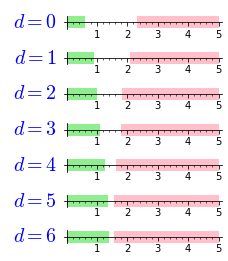

In [109]:
sigsbydepth = [
    sig for t, sig, m in ress[0:7]
]

g = multi_graphics(sum(
    ([(text(f"$d={i}$", (1.7,0.8), fontsize=20, axes=False),
      (0.025, 0.95*(1 - i/(len(sigsbydepth) - 1)) + 0.05, 0.25, 0.95*1/len(sigsbydepth))),
     (plt1(sig, 1/5),
      (0.275, 0.95*(1 - i/(len(sigsbydepth) - 1)) + 0.05, 0.70,
       0.95*1/len(sigsbydepth)))]
     for i, sig in enumerate(sigsbydepth)), []))
fig = g.matplotlib()
fig.set_size_inches(textwidth/2, textwidth/2)
fig.savefig("output/refined-signal.pgf", dpi=72)
fig.savefig("output/refined-signal.pdf", dpi=72)
fig

In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.DataFrame(
    np.array(
        [[i, t, sig.values[1][0].lower() - sig.values[0][0].upper()]
         for i, (t, sig, m) in enumerate(ress)],
    ),
    columns=['depth',
             'time',
             'unknown_width'],
); data

depth        time  unknown_width
0    0.0    1.364460       1.693359
1    1.0    2.537713       1.102606
2    2.0    5.709451       0.736501
3    3.0   15.867197       0.588455
4    4.0   49.222948       0.339876
5    5.0  166.723845       0.180085
6    6.0  576.609451       0.101881

In [39]:
data.to_hdf("depth-time-width.hdf", key='depth')

In [66]:
def as_animation(csig, depth, a, b, step):
    with suppress_stdout():
        return animate(
        [csig.G(t0).plot_histogram2d(depth)
             + text("t = {:.2f}".format(float(t0)), (5, 0.4))
         for t0 in srange(a, b, step, include_endpoint=True)], axes=False)
    
def as_video(filename, animation, delay=10):
    animation.ffmpeg(savefile=f'{filename}.webm', ffmpeg_options="-threads 8 -lossless 1", delay=delay)
    return html(f"<video src='{filename}.webm' autoplay loop playsinline />")

In [67]:
def as_keyframes(csig, depth, a, b, n):
    with suppress_stdout():
        return [csig.G(t0).plot_histogram2d(depth)
         for t0 in srange(a, b, (b - a)/n, include_endpoint=True)]

In [68]:
help(sage.rings.real_mpfr.RealNumber.__format__)

Help on method_descriptor:

__format__(self, format_spec, /)
    Default object formatter.



In [69]:
as_video("animation2", as_animation(csig, 4, 0, 3, 0.05), 30)

NameError: name 'csig' is not defined

In [ ]:
a = as_animation(csig, 4, 1.1, 2.4, (2.4 - 1.1)/(3*4 - 1))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(5,5))
a.graphics_array(3)

In [ ]:
a = as_keyframes(csig, 4, 1, 2.5, 3*4)

In [ ]:
for i, f in enumerate(a,1):
    f.save(f"histogram-frame-{i}.pdf")

In [ ]:
!ls

In [ ]:
with suppress_stdout():
    p = csig.G(1).plot_histogram2d(4)
    
p

In [ ]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
    mask=Mask(RIF(0, 5), [RIF(0.5, 1), RIF(3, 4)]),
)
sig.plot()

In [ ]:
sig = P.signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

In [ ]:
P

In [ ]:
ctx_sig = P.context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [ ]:
ctx_sig.refined_signal(2).plot()

In [ ]:
ctx_sig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [ ]:
ctx_sig.refined_signal(1).plot()

In [ ]:
ctx_sig.refined_signal(2).plot()

In [ ]:
ctx_sig.refined_signal(3).plot()

In [ ]:
ctx_sig = Atomic(var("Whelk") > 1.15).context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [ ]:
prop = (F(RIF(0.1, 0.2), P) & Atomic(var("Whelk") > 1.15))
prop

In [ ]:
ctx_sig = prop.context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [ ]:
ctx_sig.plot_histogram2d(4)

In [ ]:
with suppress_stdout():
    p3 = ctx_sig.plot_histogram2d(5)
    
p3

In [ ]:
ctx_sig.refined_signal(1).plot()

In [ ]:
sig = ctx_sig.refined_signal(2)

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(3)

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(4)

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(5)

In [ ]:
sig.plot()

In [ ]:
su = m.process("[1, 1.2] Whelk || [5, 6] Lobster with network N([0.7, 0.75], 0.6, 0.3, 0.05, 2)").as_system

In [ ]:
from flowstar.reachability import IntegrationMethod

In [ ]:
help(IntegrationMethod)

In [ ]:
ctx_sig = prop.context_signal_for_system(
    su, 5, order=6, step=(0.001, 0.1),
    precondition=1,
    estimation=1e-3,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-5,
    max_remainder_queue=500,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [ ]:
ctx_sig.refined_signal(4).plot()

In [ ]:
ctx_sig.plot_histogram2d(4)

### Polynomial plot

In [ ]:
#p + reach.sage_interval_plot('x', 'y',
#                             poly=(x - 1)^2 + y^2 - 0.2,
#                             aspect_ratio='automatic')

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (s, 7)

In [ ]:
"[0.05, 0.1] Whelk" >> G(RIF(0,0.2), P)

In [ ]:
sig = ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~ P)
       ).signal_for_system(s, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sigM = ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)
       ).signal_for_system(s, 10, use_masks=True, **kwargs)
sigM

In [ ]:
sigM.plot()

In [ ]:
sigM.mask

In [ ]:
%%time
sigG = G(RIF(10.2, 10.3), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
         ).signal_for_system(s, 0, **kwargs)

In [ ]:
sigG(0)

In [ ]:
%%time
sigG = G(RIF(10.2, 10.3), ("[0.05,0.1] Whelk" >> F(RIF(0,0.2), ~P)),
         ).signal_for_system(s, 0, use_masks=True, **kwargs)

In [ ]:
%%time
sigG = F(RIF(5, 5.1),
         "[1, 1.5] Lobster" >>
         G(RIF(10.2, 10.3),
           "[0.05, 0.1] Whelk" >>
            F(RIF(0,0.2), ~ P)),
         ).signal_for_system(s, 0, **kwargs)

In [ ]:
%%time
sigG = F(RIF(5, 5.1),
         "[1, 1.5] Whelk" >>
         G(RIF(10.2, 10.3),
           "[0.05, 0.1] Whelk" >>
            F(RIF(0,0.2), ~ P)),
         ).signal_for_system(s, 0, use_masks=True, **kwargs)

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~ P))),
         ).signal_for_system(s, 0, **kwargs)

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~P))),
         ).signal_for_system(s, 0, use_masks=True, **kwargs)

In [ ]:
sigG(0)

In [ ]:
sigG

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~P))),
         ).signal_for_system(s, 10, use_masks=False, **kwargs)

In [ ]:
%%time
sigG = G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~P))),
         ).signal_for_system(s, 10, use_masks=True, **kwargs)

In [ ]:
sigG.plot()

## Context signal (masked)

In [ ]:
sigG = G(RIF(1, 1.1), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
         ).signal_for_system(s, 10, use_masks=True, **kwargs)

In [ ]:
sigG.plot()

In [ ]:
csigG = G(RIF(1, 1.1), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
          ).context_signal_for_system(s, 10, use_masks=True, **kwargs)

In [ ]:
csigG.signal.plot()

In [ ]:
csigG.refined_signal(1).plot()

In [ ]:
csigG = G(RIF(1, 1.1), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
          ).context_signal_for_system(s, 10, use_masks=True, refine=1, **kwargs)

In [ ]:
csigG.refined_signal(0).plot()

In [ ]:
csigG.refined_signal(1).plot()

In [ ]:
csigG = G(RIF(1, 1.1), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
          ).context_signal_for_system(s, 10, use_masks=True, refine=2, **kwargs)

In [ ]:
csigG.refined_signal(0).plot()

In [ ]:
csigG.refined_signal(1).plot()

In [ ]:
sf = m.process("[0, 1.5] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

In [ ]:
csigGsf = G(RIF(1, 1.1), ("[0.05, 0.1] Whelk" >> F(RIF(0,0.2), ~P)),
          ).context_signal_for_system(sf, 10, use_masks=True, refine=2, **kwargs)

In [ ]:
csigG.plot_histogram2d(3)

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])